In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

In [3]:
%cd data

/home/pierre-luc/option-critic-experiments/aaai2017/plots-pinball/data


In [4]:
fnames = [
'optioncritic-pinball-baseline_True-discount_0.99-epsilon_0.01-lr_critic_0.01-lr_intra_0.001-lr_term_0.001-nepisodes_250-noptions_4-nruns_1000-nsteps_10000-order_3.npy',
'optioncritic-pinball-baseline_False-discount_0.99-epsilon_0.01-lr_critic_0.01-lr_intra_0.001-lr_term_0.001-nepisodes_250-noptions_3-nruns_1000-nsteps_10000-order_3.npy',
'optioncritic-pinball-baseline_False-discount_0.99-epsilon_0.01-lr_critic_0.01-lr_intra_0.001-lr_term_0.001-nepisodes_250-noptions_2-nruns_1000-nsteps_10000-order_3.npy']    

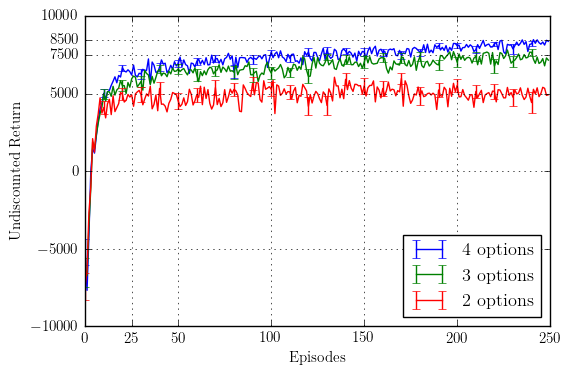

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

nruns = 250
for fname in fnames:
    if fname.startswith('optioncritic') and fname.endswith('.npy'):
        data = np.load(fname)
        data = data[data[:,0] != 0,:]
        means, semerr = np.mean(data[:nruns,:], axis=0), sem(data[:nruns,:], axis=0)      
        plt.errorbar(range(nruns), means, semerr, errorevery=10)
        
plt.legend(['4 options', '3 options', '2 options'], loc='lower right')
plt.xlabel('Episodes')
plt.ylabel('Undiscounted Return')
plt.yticks([-10000, -5000, 0, 5000, 7500, 8500, 10000])
plt.xticks([0, 25, 50, 100, 150, 200, 250])
plt.grid()
#plt.savefig('pinball.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

In [18]:
from matplotlib.collections import LineCollection

trajectory = np.load('traj5.npy')

# Parse domain configuration
obstacles = []
target_pos = []
target_rad = 0.01
ball_rad = 0.01
start_pos = []
with open('pinball_simple_single.cfg') as fp:
    for line in fp.readlines():
        tokens = line.strip().split()
        if not len(tokens):
            continue
        elif tokens[0] == 'polygon':
            obstacles.append((list(zip(*[iter(map(float, tokens[1:]))] * 2))))
        elif tokens[0] == 'target':
            target_pos = [float(tokens[1]), float(tokens[2])]
            target_rad = float(tokens[3])
        elif tokens[0] == 'start':
            start_pos = list(zip(*[iter(map(float, tokens[1:]))]*2))
        elif tokens[0] == 'ball':
            ball_rad = float(tokens[1])

fig = plt.figure()
ax = fig.add_subplot(111)

ax.invert_yaxis()
ax.axis('equal')
ax.set_axis_off()

for obs in obstacles:
    ax.add_patch(plt.Polygon(obs, fc='#404040'))
ax.add_patch(plt.Circle(target_pos, target_rad, ec='None', fc='red'))

traj = np.row_stack(trajectory[:,0])
cmap = plt.cm.rainbow(np.linspace(0, 1, len(set(trajectory[:,-1]))))
ax.scatter(traj[:,0], traj[:,1], alpha=0.8, color=np.row_stack(list(map(lambda w: cmap[int(w)], trajectory[:,-1]))))
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])
#plt.show()
fig.subplots_adjust(top=0.85, left=0.0005)
#fig.savefig('pinball-traj5.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f087e494620> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex': 'latex'

<Figure size 432x288 with 1 Axes>

In [9]:
trajectory[:,-1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 1, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3], dtype=object)

In [10]:
%cd ../../jean/pinball/

[Errno 2] No such file or directory: '../../jean/pinball/'
/home/tokudo/Downloads/pinball-experiments/data


In [8]:
fnames = [
'termination-optioncritic-pinball-baseline_True-discount_0.99-epsilon_0.01-lr_action_0.001-lr_critic_0.01-lr_intra_0.001-lr_term_0.001-margin_0.0-nepisodes_250-noptions_4-nruns_250-nsteps_10000-order_3-temperature_0.01.npy',
'termination-optioncritic-pinball-baseline_True-discount_0.99-epsilon_0.01-lr_action_0.001-lr_critic_0.01-lr_intra_0.001-lr_term_0.001-margin_0.0-nepisodes_250-noptions_16-nruns_250-nsteps_10000-order_3-temperature_0.01.npy'
]
for fname in fnames:
    if fname.endswith('.npy'):
        data = np.load(fname)
        print(np.sum(data[:,0,0] != 0))
        print(fname)
        data = data[data[:,0,0] != 0, :]

        avgscores = np.mean(data[:60], axis=0)
        plt.plot(avgscores[:,1])
    
plt.ylim(2,4)
plt.xlabel('Episodes')
plt.ylabel('Average Duration')
#plt.xticks([0,250,500,1000,1250,1500,2000])
#plt.legend(['SARSA(0)', 'AC-PG', 'OC 4 options', 'OC 8 options'], loc='upper right')
plt.legend(['OC 4 options', 'OC 16 options'])
plt.grid()
plt.savefig('avgdurations.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

FileNotFoundError: [Errno 2] No such file or directory: 'termination-optioncritic-pinball-baseline_True-discount_0.99-epsilon_0.01-lr_action_0.001-lr_critic_0.01-lr_intra_0.001-lr_term_0.001-margin_0.0-nepisodes_250-noptions_4-nruns_250-nsteps_10000-order_3-temperature_0.01.npy'